
# **Predicting BMV prices**




In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [95]:
df= pd.read_csv('/content/drive/MyDrive/final project master/project1/bmw_pricing_v2.csv')

Let's see the variables in the data frame and some more information of our dataframe

In [96]:
df.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


# **EDA**

Text(0.5, 1.0, 'Number of cars based on size')

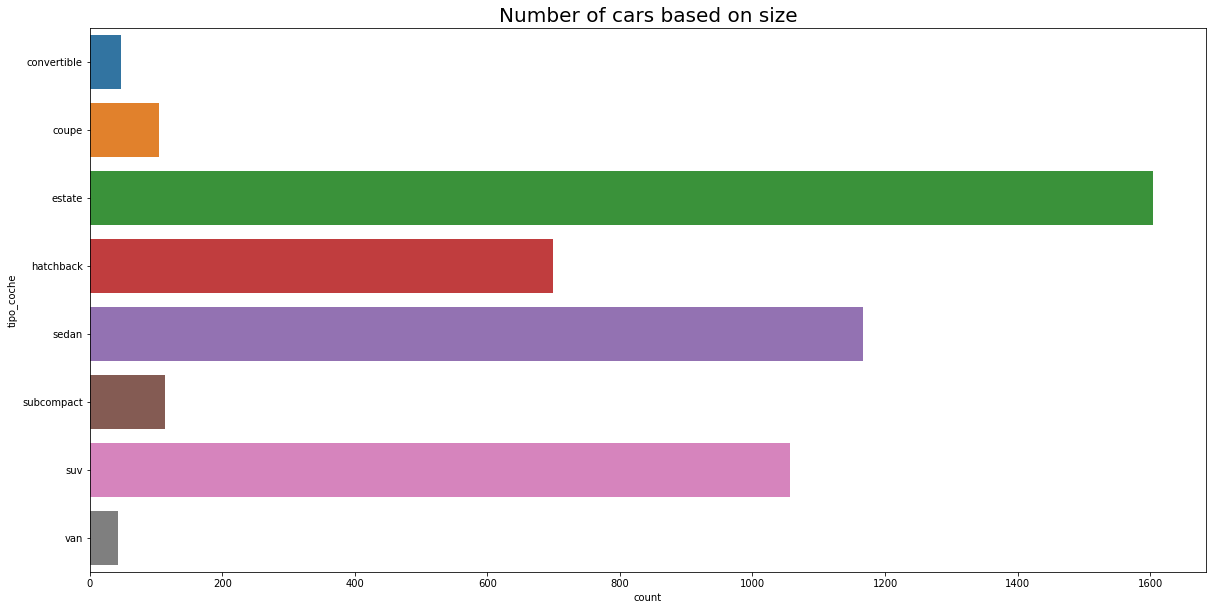

In [97]:
plt.figure(figsize=(20,10))
sns.countplot(y=df.tipo_coche, data=df)
plt.title('Number of cars based on size', fontsize=20)

As could be seen, most of the car observation are estate cars, something aligned with reality since people prefers comfortability and spacious over style like coupe.

In [98]:
for i in 'fecha_registro', 'fecha_venta':
  df[i]=pd.to_datetime(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        4841 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               4842 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4831 non-null   object        
 7   tipo_coche                   4834 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4841 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  4839 non-null 

Text(0.5, 1.0, 'Number of cars in different years')

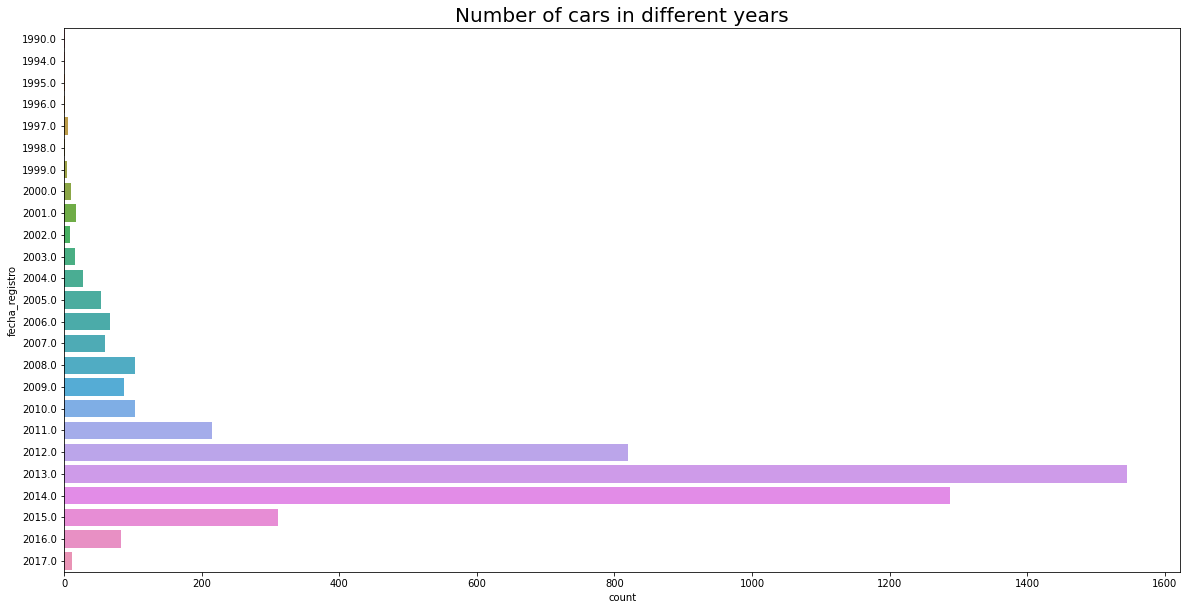

In [99]:
plt.figure(figsize=(20,10))
sns.countplot(y= df.fecha_registro.dt.year)
plt.title('Number of cars in different years', fontsize=20)


As it could be seen in the plot, the data is not relatively new since most of the price observation goes from 2011 to 2015. Meaning something not good because our prediction would be based on past data.

Text(0.5, 1.0, 'Average price based on engine type')

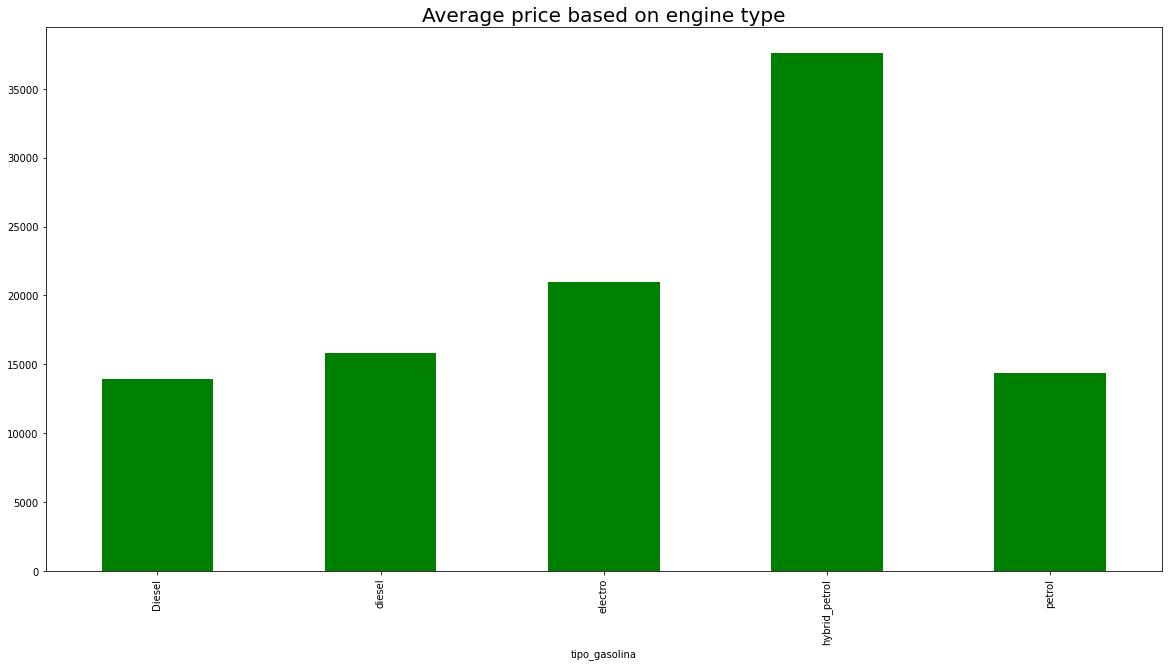

In [100]:
plt.figure(figsize=(20,10))
df.groupby("tipo_gasolina")['precio'].mean().plot(kind='bar', color='green')
plt.title('Average price based on engine type', fontsize=20)

As the plot shows, there is a misclassification in the type of fuel engine, although it can be seen how the hybrid_petrol engine is the most expensive on average price.

No more exploratory data analysis in general can be conducted since there are misclassifications within categorical variables. It would be needed some data cleaning, but first let´s end checking the data structure.

# **1 Data structure/ distribution**

In [101]:
df.shape

(4843, 18)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        4841 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               4842 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4831 non-null   object        
 7   tipo_coche                   4834 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4841 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  4839 non-null 

In [103]:
df.describe(percentiles=[0.1,0.25,0.5, 0.75])

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
10%,6.500800e+04,85.000000,7400.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


Checking basic statistics we can see some mismatch between the percentile 10% and the min prices of bmws, meaning the possibility of outliers in the prices, which is our target for predictions.

**2 NaN values and duplicates**

In [104]:
# Let's start with Na values and duplicates.

df.isna().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [105]:
df[df.duplicated()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [106]:
df.isna().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

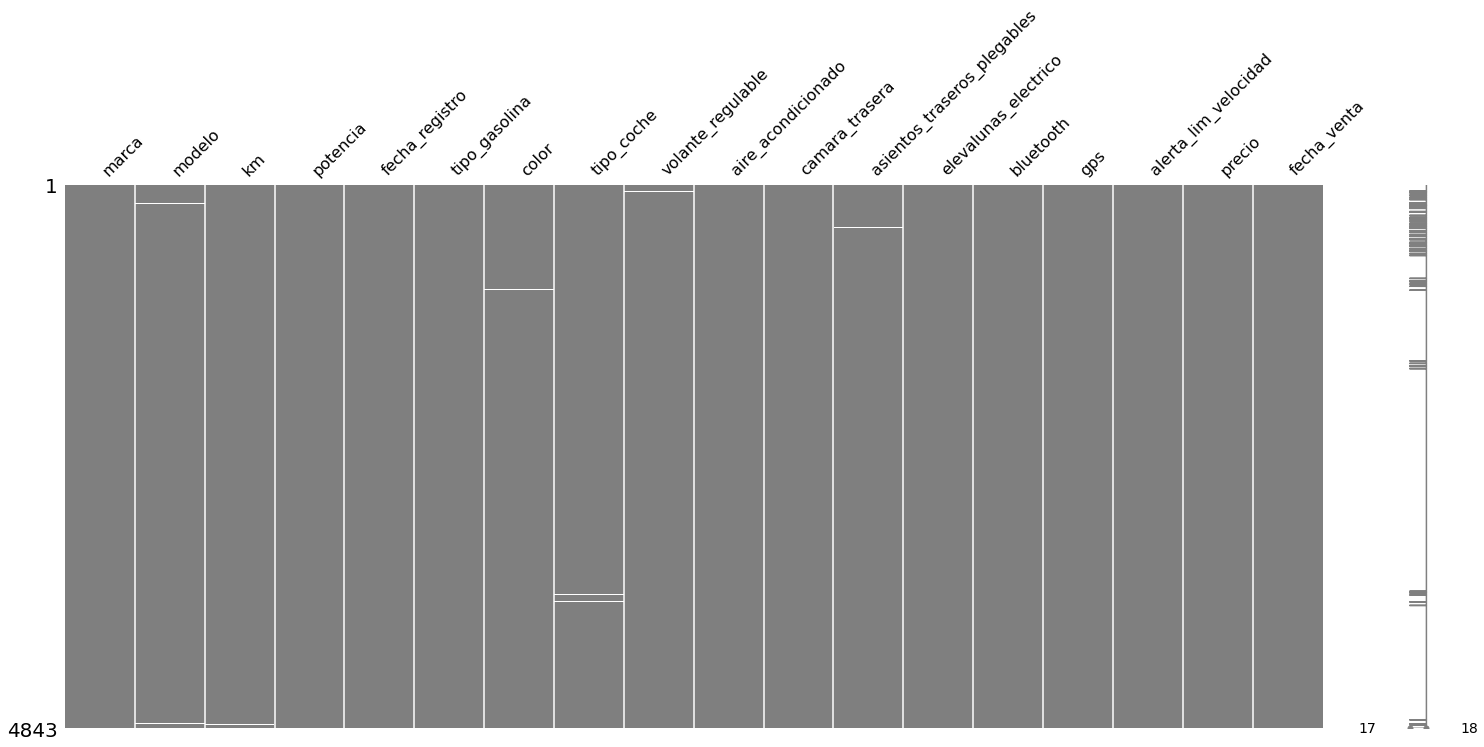

In [107]:
msno.matrix(df, color = (0.5, 0.5, 0.5))

In [108]:
df[df['color'].isna()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
239,BMW,318,132731.0,100.0,2013-09-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,12500.0,2018-01-01
834,BMW,318,148429.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,True,True,False,10500.0,2018-04-01
855,BMW,318,139736.0,100.0,2009-02-01,diesel,NaN,estate,False,False,False,False,False,False,True,False,5800.0,2018-04-01
864,BMW,318,157661.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,7700.0,2018-04-01
884,BMW,320,145981.0,122.0,2013-07-01,diesel,NaN,estate,True,True,False,False,True,True,True,False,15800.0,2018-04-01
904,BMW,320,126425.0,120.0,2013-07-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,13000.0,2018-04-01
939,BMW,520,153102.0,140.0,2015-04-01,diesel,NaN,estate,True,True,True,False,True,False,True,False,19800.0,2018-04-01
1569,BMW,318,191804.0,100.0,2013-10-01,diesel,NaN,estate,False,True,False,False,True,True,True,False,3800.0,2018-07-01
1591,BMW,320,130624.0,120.0,2013-07-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,10700.0,2018-07-01
1612,BMW,330,23811.0,190.0,2015-12-01,diesel,NaN,estate,True,True,True,False,False,False,True,True,28900.0,2018-08-01


In [109]:
df[df['tipo_coche'].isna()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
243,BMW,318,144727.0,105.0,2014-04-01,diesel,white,NaN,False,True,True,False,True,True,True,True,14300.0,2018-06-01
424,BMW,520,271181.0,100.0,2002-05-01,diesel,blue,NaN,True,False,False,False,False,False,True,False,800.0,2018-02-01
3621,BMW,316,171640.0,85.0,2012-07-01,diesel,white,NaN,True,False,False,False,False,False,True,False,10800.0,2018-09-01
3632,BMW,116,123064.0,85.0,2004-10-01,petrol,black,NaN,False,False,False,False,False,False,True,False,2400.0,2018-05-01
3634,BMW,118,224562.0,100.0,2007-07-01,diesel,black,NaN,False,False,False,False,False,False,True,False,3800.0,2018-06-01
3654,BMW,116,156610.0,85.0,2005-01-01,petrol,grey,NaN,False,False,True,False,False,True,True,False,3600.0,2018-02-01
3716,BMW,118,181781.0,100.0,2013-10-01,diesel,grey,NaN,True,True,True,False,False,True,True,False,9500.0,2018-05-01
3747,BMW,X1,61354.0,105.0,2013-11-01,diesel,blue,NaN,False,False,False,False,False,False,False,True,16900.0,2018-06-01
4842,BMW,525,195840.0,160.0,2013-01-01,diesel,grey,NaN,True,True,False,False,True,False,True,True,15500.0,2018-09-01


In [110]:
df1=df.copy()

NaN values will be deleted since they are not significant in each column, this can be observer in the msno.matrix.

In [111]:
df1.dropna(inplace=True)
df1.isna().sum()

marca                          0
modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

In [112]:
df.shape


(4843, 18)

In [113]:
df1.shape

(4781, 18)

There have been 51 observations deleted, something good.
Before splitting variables into categorical, booleans and numerics we will do the univariable analysis to see if there has to be committed any additional data cleaning.




3.   **Univariable analysis**




In [114]:
# Univariable analysis, starting with categorical values, which represent the mayority of variables.
for i in df1.columns:
  if df1.columns.dtype.kind == 'O':
    print('\n', i, df1[i].value_counts(), '\n')



 marca BMW    4781
Name: marca, dtype: int64 


 modelo 320                737
520                624
318                552
X3                 437
116                356
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 


 km 129214.0    2
187698.0    2
94829.0     2
120833.0    2
167205.0    2
           ..
138489.0    1
85814.0     1
206362.0    1
132357.0    1
27920.0     1
Name: km, Length: 4725, dtype: int64 


 potencia 135.0    867
120.0    777
85.0     625
100.0    558
105.0    441
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: potencia, Length: 61, dtype: int64 


 fecha_registro 2013-07-01    168
2014-03-01    161
2014-05-01    148
2013-09-01    146
2013-10-01    143
             ... 
1998-09-01      1
2000-05-01      1
2004-12-01      1
2002-09-01      1
2007-12-01      1
Name: fecha_registro, Length: 199, dtyp

At first glance, we can see that brand columns make no sense to keep. In addition, there seems to be a misclassification in tipo_gasolina ('tipo_gasolina diesel'), mixing diesel and gasoline. Furthermore, there seems to be other irrelevant variables to predict the prices like, asientos_traseros_plegables,  volante_regulable, bluetooth,  alerta_lim_velocidad due to their real value in the car and the value that represent for the car, we will check it in the correlation later on.     

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa89d4ff2b0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa89d4c6b20>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa89d49baf0>]]


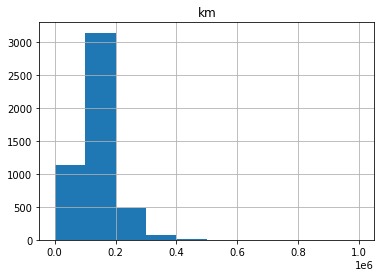

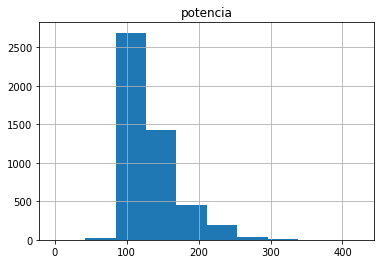

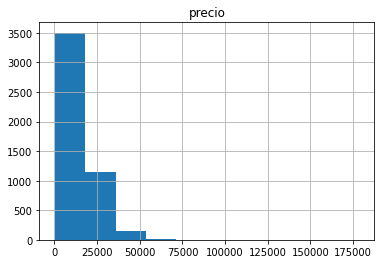

In [115]:
#Numercial values analysis(no presence of booleans)
for i in df.columns:
  if df[i].dtype.kind in ('f', 'i'):
    print(df.hist(i))

All the numericas variables present a positive skewness, where it has to be highlighted the presence of outlier in price and the possibility of some in potency, there are no usual cars with less than 100 house power.

Going back to categorical variable, let's start the data cleaning with model column since there seems to be to many models.

*Data cleaning*

In [116]:
# Model has no impact in the prediction

df1.drop('marca', axis=1, inplace=True)

We've seen some mismatches in modelo, and few observations in a specific type of tipo_gasolina and color. Hence, we will proceed to delete them in order to clean the dataset, defining a function which works as: Creating an empty list, counting the dataset values, and resetting the index to make it a dataset. 

Then the data set is traversed and it is asked if the new dataset that has the counts of the values ​​is less than the threshold, if so, it is added to a list.

In [117]:
df2=df1.copy()

In [118]:
df2.modelo

0                     118
1                      M4
2                     320
3                     420
4                     425
              ...        
4837      218 Gran Tourer
4838      218 Gran Tourer
4839    218 Active Tourer
4840      218 Gran Tourer
4841    218 Active Tourer
Name: modelo, Length: 4781, dtype: object

In [119]:
for i in df.modelo:
  print(i)

118
M4
320
420
425
335
325
118
Z4
320
320
325
420
420
120
120
220
650
325
Z4
135
218
420
220
Z4
318
430
420
Z4
320
118
Z4
218
420
120
Z4
318
650
218
320
420
M3
330
120
120
218
318
420
420
118
218
320
420
420
420
225
320
M235
316
420
435
425
435
640
420
640
320
M3
640 Gran Coupé
420
220
420
M4
M3
420
640
218
320
435 Gran Coupé
640
120
420
420
420
M235
320
640
120
420
420
i8
420
420
M3
420
330
420
320
320
435
320
320
M235
420
135
420
420
630
640
420
435
420
640
420
420
640 Gran Coupé
430
420
430 Gran Coupé
420
335
420
420
420
320
420
420
320
420
320
325
420
320
335
320
218
118
218
640
M3
330
320
635
320
325
320
320
218
320
320
430 Gran Coupé
320
318
520
318
320
320
316
330
318
520
520
318
316
318
320
316
520
318
316
320
316
316
nan
520
525
320
525
318
320
320
525
520
320
316
320
320
320
316
325
316
320
320
318
318
330
318
320
318
318
320
318
318
318
530
320
320
316
318
318
320
530
316
330
320
320
320
318
320
320
316
320
318
318
318
320
520
316
530
318
318
320
320
520
320
318
320
535
520


In [120]:
def classify_series(x):
    if str(x).startswith('1') or str(x).startswith('X1') or str(x).startswith('M1'):
        return 'serie1'
    elif str(x).startswith('2') or str(x).startswith('X2') or str(x).startswith('M2'):
        return 'serie2'
    elif str(x).startswith('3') or str(x).startswith('X3') or str(x).startswith('M3'):
        return 'serie3'
    elif str(x).startswith('4') or str(x).startswith('X4') or str(x).startswith('Z4') or str(x).startswith('M4'):
        return 'serie4'
    elif str(x).startswith('5') or str(x).startswith('X5') or str(x).startswith('M5'):
        return 'serie5'
    elif str(x).startswith('6') or str(x).startswith('X6'):
        return 'serie6'
    elif str(x).startswith('7'):
      return 'serie7'
    else:
        return 'hybrid'


# Creating a new column 'series' based on the values in 'modelo'
df2['series'] = df2['modelo'].apply(classify_series)

In [121]:
pd.reset_option('max_rows', None)
df2.series.value_counts()

serie3    2207
serie5    1390
serie1     833
serie4     154
serie6      82
serie7      54
serie2      52
hybrid       9
Name: series, dtype: int64

In the new column called 'series' it has been grouped the old observation from modelo by the type of series of each car's observation, clearly seen in the function defined. So the column modelo is not needed anymore. 
On the other hand as we saw before there was another misclassification in the type of fuel in 'typo_gasolina'


In [122]:
df2['tipo_gasolina'].value_counts()

diesel           4576
petrol            189
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [123]:
df2['tipo_gasolina'] = df2['tipo_gasolina'].apply(lambda x: x.lower())

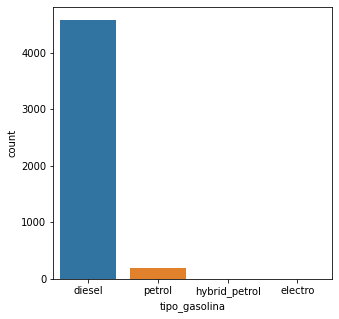

In [124]:
plt.figure(figsize=(5,5))
sns.countplot(x="tipo_gasolina", data=df2)

As could be seen almost every car in the data frame use diesel fuel. This is due to fact that almost any of the cars where M1, M2, M3... which are the ones that uses petrol. The quantity of this cars observation was seen where it was made the transformation from 'modelo' to 'series'


One we got the data set apparently clean, we're going to check is every has worked correctly.

In [125]:
for i in df2.columns:
  if df2[i].dtype.kind in ('O'):
    print('\n', i , df2[i].value_counts(), '\n')


 modelo 320                737
520                624
318                552
X3                 437
116                356
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 


 tipo_gasolina diesel           4581
petrol            189
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64 


 color black     1614
grey      1162
blue       699
white      526
brown      340
silver     324
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64 


 tipo_coche estate         1562
sedan          1167
suv            1056
hatchback       699
subcompact      113
coupe            96
convertible      47
van              41
Name: tipo_coche, dtype: int64 


 volante_regulable True     2635
False    2146
Name: volante_regulable, dtype: int64 


 aire_acondicionado True     3799
False     982
Name: aire_acondicionado, dt

It's been forgotten to delete the 'modelo' columns

In [126]:
df2.drop('modelo', axis=1, inplace=True)

In [127]:
df2


,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,series
0,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01,serie1
1,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01,serie4
2,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01,serie3
3,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01,serie4
4,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01,serie4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,66770.0,110.0,2015-10-01,diesel,blue,van,False,True,False,False,False,False,True,False,13400.0,2018-07-01,serie2
4838,39743.0,110.0,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,2018-08-01,serie2
4839,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,2018-08-01,serie2
4840,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,2018-09-01,serie2


For future preprocessing steps, it'd be easy to delete fechas(dates)

In [128]:
for i in [ 'fecha_venta', 'fecha_registro']:
  del(df2[i])

In [129]:
df2

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series
0,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,serie1
1,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,serie4
2,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,serie3
3,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,serie4
4,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,serie4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,66770.0,110.0,diesel,blue,van,False,True,False,False,False,False,True,False,13400.0,serie2
4838,39743.0,110.0,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,serie2
4839,49832.0,100.0,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,serie2
4840,19633.0,110.0,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,serie2


#  **4 Spliting variables into categorical, numericals, booleans and target**

This is done for future prepocesing steps such as getting dummies variables(it could be done later on).

In [130]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4781 entries, 0 to 4841
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4781 non-null   float64
 1   potencia                     4781 non-null   float64
 2   tipo_gasolina                4781 non-null   object 
 3   color                        4781 non-null   object 
 4   tipo_coche                   4781 non-null   object 
 5   volante_regulable            4781 non-null   object 
 6   aire_acondicionado           4781 non-null   object 
 7   camara_trasera               4781 non-null   object 
 8   asientos_traseros_plegables  4781 non-null   object 
 9   elevalunas_electrico         4781 non-null   object 
 10  bluetooth                    4781 non-null   object 
 11  gps                          4781 non-null   bool   
 12  alerta_lim_velocidad         4781 non-null   object 
 13  precio            

In [131]:
target=['precio']
def get_variables(dataset):
  
  numeric_list=[]
  categorical_list=[]
  boolean_list=[]

  for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              numeric_list.append(i)
        elif  (dataset[i].dtype.kind in('O', 'b'))  and len(dataset[i].unique())== 2  and i not in target:
              boolean_list.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              categorical_list.append(i)
                
  return numeric_list, categorical_list, boolean_list

        
        

In [132]:
numeric_list, categorical_list, boolean_list = get_variables(df2)

In [133]:
boolean_list

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [134]:
df2

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series
0,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,serie1
1,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,serie4
2,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,serie3
3,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,serie4
4,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,serie4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,66770.0,110.0,diesel,blue,van,False,True,False,False,False,False,True,False,13400.0,serie2
4838,39743.0,110.0,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,serie2
4839,49832.0,100.0,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,serie2
4840,19633.0,110.0,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,serie2


Now we're going to continue with the preprocessing part, where we are going to see correlation between variables, how the target variable behaves and we will see the relation between target and independent variables.

# **5 Preprocesing**

**5.1Correlation**

In [135]:
df_prep= df2.copy()

In [136]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4781 entries, 0 to 4841
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4781 non-null   float64
 1   potencia                     4781 non-null   float64
 2   tipo_gasolina                4781 non-null   object 
 3   color                        4781 non-null   object 
 4   tipo_coche                   4781 non-null   object 
 5   volante_regulable            4781 non-null   object 
 6   aire_acondicionado           4781 non-null   object 
 7   camara_trasera               4781 non-null   object 
 8   asientos_traseros_plegables  4781 non-null   object 
 9   elevalunas_electrico         4781 non-null   object 
 10  bluetooth                    4781 non-null   object 
 11  gps                          4781 non-null   bool   
 12  alerta_lim_velocidad         4781 non-null   object 
 13  precio            

In [137]:
df_prep

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series
0,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,serie1
1,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,serie4
2,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,serie3
3,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,serie4
4,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,serie4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,66770.0,110.0,diesel,blue,van,False,True,False,False,False,False,True,False,13400.0,serie2
4838,39743.0,110.0,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,serie2
4839,49832.0,100.0,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,serie2
4840,19633.0,110.0,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,serie2


In [138]:
corr= df_prep.corr()

In [139]:
corr.style.background_gradient(cmap = 'coolwarm')

,km,potencia,gps,precio
km,1.000000,-0.048097,0.154224,-0.408327
potencia,-0.048097,1.000000,0.007742,0.638227
gps,0.154224,0.007742,1.000000,-0.008833
precio,-0.408327,0.638227,-0.008833,1.000000


There is no strong multicollinearity between independent variable, but it's can be seen how gps does have little impact on price and how horsepower will influence the price. Future correlation will be observed when categorical and booleans variables will be converted into numeric ones.


**5.2 Analysis of the target variable**

Let's continue by analysis the target variable, which seems to have outlier, this was seen by basic statistics at the beggining

In [140]:
df_prep.precio.describe(percentiles = [0.1, 0.9])

count      4781.000000
mean      15878.519138
std        9233.647583
min         100.000000
10%        7500.000000
50%       14200.000000
90%       25800.000000
max      178500.000000
Name: precio, dtype: float64

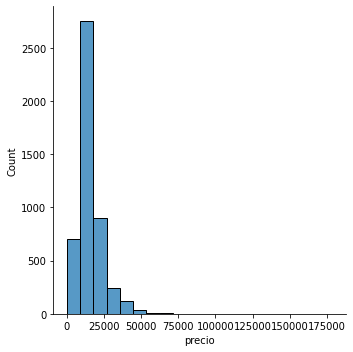

In [141]:
sns.displot(x='precio', data= df_prep, bins=20)

In the plot it's can be seen how the price stars by 0, something that make no sence. Also we can observe how the price distributio has a positive skewness and positive kurtosis.

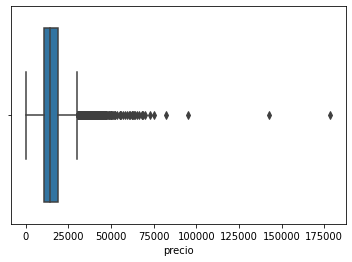

In [142]:
sns.boxplot( x= df_prep.precio)

In [143]:
df_prep[df_prep['precio'] < 500]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series
565,179358.0,120.0,diesel,black,estate,False,True,False,False,False,False,True,True,100.0,serie3
879,134156.0,105.0,diesel,grey,estate,False,True,False,False,False,False,False,True,100.0,serie3
1255,170381.0,135.0,diesel,silver,estate,True,True,False,False,False,False,True,False,100.0,serie3
1513,358332.0,100.0,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,serie5
1558,358333.0,100.0,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,serie5
1832,174524.0,85.0,diesel,blue,hatchback,False,True,False,False,False,False,True,True,100.0,serie1
2473,230578.0,85.0,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,serie5
2574,229880.0,85.0,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,serie5
2611,230264.0,85.0,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,serie5
2829,439060.0,105.0,diesel,silver,sedan,False,False,True,False,False,False,True,False,100.0,serie5


In [144]:
df_prep['precio'] = np.where(df_prep['precio'] < 500, df_prep['precio'].mean(), df_prep['precio'])

If you check the bmws market on the internet, it's clearly seen, at least in the Spanish market, that there's any bmws for less than 1000 eu, no matter his age or the km. So, let's change these observations to the mean.

On the other hand, as it's seen in the box plot the price seems to have outliers in the higher values.

In [145]:
df_prep[df_prep['precio'] > 90000]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series
90,12402.0,170.0,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,hybrid
4684,103222.0,140.0,diesel,grey,suv,True,True,False,False,True,False,True,True,142800.0,serie4
4753,72515.0,135.0,diesel,blue,suv,False,False,True,False,False,False,False,True,178500.0,serie3


There is a clear mistake in the price for the last two observations, so let's do the same with higher values.

In [146]:
df_prep['precio'] = np.where(df_prep['precio'] > 100000, df_prep['precio'].mean(), df_prep['precio'])

In order to change the price distibrution, we're going to create a new target variable through applying log10.

In [147]:
df_prep['log_precio'] = np.log10(df_prep['precio'])

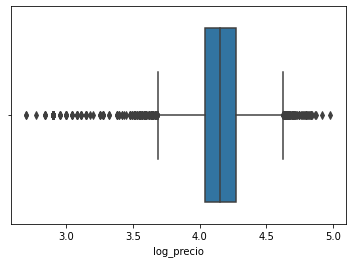

In [148]:
sns.boxplot( x= df_prep['log_precio'])

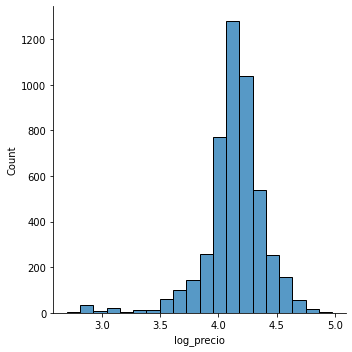

In [149]:
sns.displot(x='log_precio', data= df_prep, bins=20)

**5.3 Target vs independent variables**

Applying a log transformation to the price data reduce the skewness and kurtosis. This works especially well for distributions with long right tails

Now we the target variable againts independent variables are going to be compared through violinplots in order to see their relevance in the target variable.

In [150]:
df_prep

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,series,log_precio
0,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,serie1,4.053078
1,13929.0,317.0,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,serie4,4.843233
2,183297.0,120.0,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,serie3,4.008600
3,128035.0,135.0,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,serie4,4.399674
4,97097.0,160.0,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,serie4,4.523746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,66770.0,110.0,diesel,blue,van,False,True,False,False,False,False,True,False,13400.0,serie2,4.127105
4838,39743.0,110.0,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,serie2,4.164353
4839,49832.0,100.0,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,serie2,4.243038
4840,19633.0,110.0,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,serie2,4.230449


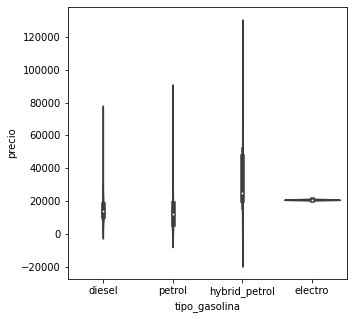

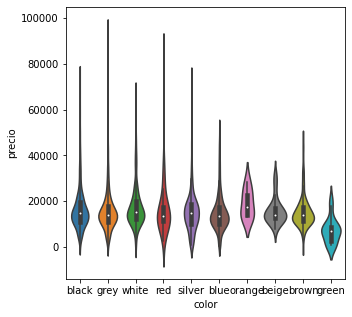

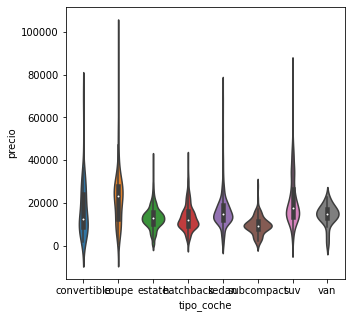

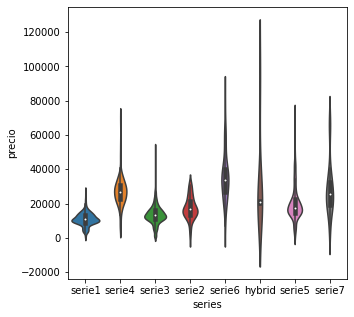

In [151]:
for i in categorical_list:
  plt.figure(figsize= (5,5))
  sns.violinplot(x= i, y= 'precio', data= df_prep)
  

In an overall way there are some characteristics of violinplot that has to be applied to this categorical variables. 
- If the violin plot does not have symmetry this means that the categorical variable doesn't follow a normal distribution and there is skewness.
-The wider the plot, the more spread out the data is.
-The taller the plot, the more data points there are for that level of the independent variable.
-If the plots are significantly different in shape or height, it may indicate that the target variable is affected by the independent variable

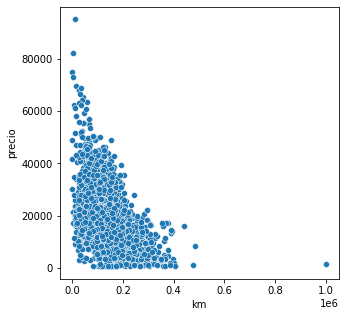

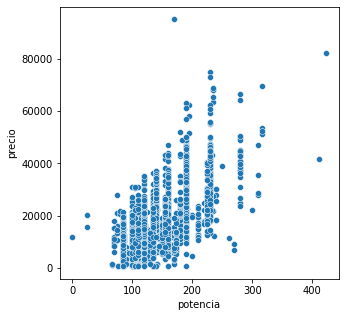

In [152]:
for i in numeric_list:
  plt.figure(figsize = (5,5))
  sns.scatterplot(y= 'precio', x= i, data = df_prep)

As can be seen fecha_registro and potencia present a positive relation againts precio. On the other hand, km has negative relation versus price . 

**5.4 Normalizing categorical variables**

Since the categorical variables don't follow a normal distribution, it's needed to normalize them, which is less sensitive to outliers than standardization. But first of all, let's get the dummy variables for our models and see the correlation to drop correlated columns

In [153]:
df_prep_cat= pd.get_dummies( data= df_prep, columns= categorical_list)
df_prep_cat

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_coche_suv,tipo_coche_van,series_hybrid,series_serie1,series_serie2,series_serie3,series_serie4,series_serie5,series_serie6,series_serie7
0,140411.0,100.0,True,True,False,False,True,True,True,False,...,0,0,0,1,0,0,0,0,0,0
1,13929.0,317.0,True,True,False,False,False,True,True,True,...,0,0,0,0,0,0,1,0,0,0
2,183297.0,120.0,False,False,False,False,True,False,True,False,...,0,0,0,0,0,1,0,0,0,0
3,128035.0,135.0,True,True,False,False,True,True,True,True,...,0,0,0,0,0,0,1,0,0,0
4,97097.0,160.0,True,True,False,False,False,True,True,True,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,66770.0,110.0,False,True,False,False,False,False,True,False,...,0,1,0,0,1,0,0,0,0,0
4838,39743.0,110.0,False,True,False,False,False,False,True,False,...,0,1,0,0,1,0,0,0,0,0
4839,49832.0,100.0,False,True,False,False,False,False,True,True,...,0,1,0,0,1,0,0,0,0,0
4840,19633.0,110.0,False,True,False,False,False,False,True,True,...,0,1,0,0,1,0,0,0,0,0


In [154]:
corr = df_prep_cat.corr()
corr.style.background_gradient( cmap = 'coolwarm')

,km,potencia,gps,precio,log_precio,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,tipo_gasolina_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,series_hybrid,series_serie1,series_serie2,series_serie3,series_serie4,series_serie5,series_serie6,series_serie7
km,1.000000,-0.048097,0.154224,-0.419353,-0.437972,0.047427,-0.037557,-0.034935,-0.036575,-0.018394,0.041539,-0.017214,-0.023689,0.055991,0.026490,-0.030632,-0.026987,0.019787,-0.069299,-0.029501,-0.065521,0.178088,-0.111168,0.062130,-0.023194,-0.112352,-0.094398,-0.052007,-0.131058,-0.131946,0.084652,-0.174555,0.135315,-0.057002,0.002118
potencia,-0.048097,1.000000,0.007742,0.672559,0.532316,-0.122169,-0.023993,0.025833,0.123188,-0.012922,0.038002,-0.017662,-0.069051,-0.013509,0.003743,0.011408,-0.005966,0.013803,0.010131,0.037745,0.126952,-0.052427,-0.227090,0.033720,-0.158605,0.236052,-0.054479,-0.032940,-0.345575,-0.039142,-0.243932,0.090823,0.396951,0.319812,0.192659
gps,0.154224,0.007742,1.000000,0.002741,0.040135,0.048063,0.006734,-0.009417,-0.048272,0.015942,0.050655,0.007270,0.041884,0.002893,0.021910,-0.014047,-0.012715,-0.037116,-0.118880,0.009858,-0.003179,0.050180,0.011994,0.036132,0.036317,-0.110403,-0.038364,-0.007583,-0.054779,-0.028144,-0.042452,-0.026603,0.094861,0.029071,0.028722
precio,-0.419353,0.672559,0.002741,1.000000,0.858019,0.002250,0.014704,0.102212,-0.025640,-0.000500,0.032593,-0.041701,-0.015740,-0.061246,-0.018779,0.012240,0.008416,-0.026939,0.066122,0.014579,0.111672,-0.213010,-0.121429,0.016450,-0.110501,0.329628,-0.014299,0.066156,-0.260684,0.019150,-0.260725,0.231093,0.279655,0.305769,0.156240
log_precio,-0.437972,0.532316,0.040135,0.858019,1.000000,0.076123,0.017945,0.057049,-0.092485,0.013824,0.037988,-0.050090,0.012972,-0.110517,-0.015848,0.016436,0.003554,-0.052630,0.067022,-0.004086,0.078017,-0.174798,-0.097946,0.035612,-0.121038,0.265322,-0.010068,0.042249,-0.232877,0.024691,-0.204199,0.191200,0.254024,0.195900,0.105916
tipo_gasolina_diesel,0.047427,-0.122169,0.048063,0.002250,0.076123,1.000000,-0.119923,-0.195936,-0.970946,-0.003228,-0.014322,0.015497,0.037490,-0.055390,-0.010695,-0.022103,-0.018982,0.006458,0.003351,-0.180374,-0.133944,0.074270,-0.031815,-0.034492,-0.008755,0.070956,-0.003228,-0.183741,-0.003178,-0.058670,0.023731,-0.056555,0.039449,-0.028724,-0.007326
tipo_gasolina_electro,-0.037557,-0.023993,0.006734,0.014704,0.017945,-0.119923,1.000000,-0.001026,-0.005084,-0.002330,-0.017888,-0.010369,-0.006933,-0.001540,0.024748,-0.000888,-0.002602,-0.006756,0.017883,-0.002497,-0.003587,-0.017455,0.060553,-0.014239,-0.003899,-0.013342,-0.002330,0.576988,-0.011510,-0.002628,-0.023202,-0.004571,-0.016043,-0.003310,-0.002678
tipo_gasolina_hybrid_petrol,-0.034935,0.025833,-0.009417,0.102212,0.057049,-0.195936,-0.001026,1.000000,-0.008306,-0.003808,0.014061,-0.002457,0.008583,-0.002517,0.000664,-0.001451,-0.004251,-0.011038,-0.014394,-0.004079,0.030622,-0.028519,0.012027,-0.011351,0.027318,0.015211,-0.003808,0.588527,-0.018805,-0.004293,-0.037909,-0.007469,-0.003672,0.034007,-0.004376
tipo_gasolina_petrol,-0.036575,0.123188,-0.048272,-0.025640,-0.092485,-0.970946,-0.005084,-0.008306,1.000000,0.004415,0.014065,-0.014074,-0.039429,0.057637,0.007669,0.023128,0.020730,-0.003452,-0.002722,0.186503,0.131659,-0.068084,0.022384,0.039650,0.003766,-0.074380,0.004415,-0.008811,0.008689,0.061519,-0.013449,0.060262,-0.037700,0.022805,0.008789
color_beige,-0.018394,-0.012922,0.015942,-0.000500,0.013824,-0.003228,-0.002330,-0.003808,0.004415,1.000000,-0.066394,-0.038486,-0.025734,-0.005717,-0.052700,-0.003297,-0.009657,-0.025076,-0.032700,0.013725,0.002858,-0.026094,0.025718,-0.000041,-0.014470,-0.000305,0.040553,-0.004039,-0.018799,0.033988,0.023086,-0.016967,-0.009592,0.005186,-0.009940


As could be seen the data set doesn't have any correlation from more than |0.8|, except 'tipo_gasolina_diesel' and 'tipo_gasolina_petrol', so it's don't needed to deleted any column, let's continue by normalizing the numerical values and dropping the log column since log column follows a normal distribution and this process if for variables which does not follow a normal distribution.

In [155]:
del(df_prep_cat['tipo_gasolina_petrol'])

In [156]:
del(df_prep_cat['log_precio'])

In [157]:
from sklearn.preprocessing import MinMaxScaler

In [158]:
def minmaxtransformacion(variable):
  MinMaxResultado= MinMaxScaler()
  df_prep[variable] = MinMaxResultado.fit_transform(df_prep[variable].values.reshape(-1,1))
  return MinMaxResultado

In [159]:
for i in numeric_list:
  globals()[f'Minmax{i}']= minmaxtransformacion(i)

In [160]:
df_prep_cat.columns


Index(['km', 'potencia', 'volante_regulable', 'aire_acondicionado',
       'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico',
       'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio',
       'tipo_gasolina_diesel', 'tipo_gasolina_electro',
       'tipo_gasolina_hybrid_petrol', 'color_beige', 'color_black',
       'color_blue', 'color_brown', 'color_green', 'color_grey',
       'color_orange', 'color_red', 'color_silver', 'color_white',
       'tipo_coche_convertible', 'tipo_coche_coupe', 'tipo_coche_estate',
       'tipo_coche_hatchback', 'tipo_coche_sedan', 'tipo_coche_subcompact',
       'tipo_coche_suv', 'tipo_coche_van', 'series_hybrid', 'series_serie1',
       'series_serie2', 'series_serie3', 'series_serie4', 'series_serie5',
       'series_serie6', 'series_serie7'],
      dtype='object')

Once we already have the numeric and categorical variables transformed in order to use the data for the model, it's also needed to give numerical values to boolean variables, if var[i]=True means 1 and vice-versa. This also could be done by getting dummy variables although drop_first would have to be True to avoid perfect multicollinearity with booleans variables or just by converting booleans variables into integers..

In [161]:

for i in boolean_list:
  df_prep_cat[i]=  df_prep_cat[i].astype('int')

In [162]:
 pd.set_option('max_columns', None)
 df_prep_cat

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,series_hybrid,series_serie1,series_serie2,series_serie3,series_serie4,series_serie5,series_serie6,series_serie7
0,140411.0,100.0,1,1,0,0,1,1,1,0,11300.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,13929.0,317.0,1,1,0,0,0,1,1,1,69700.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,183297.0,120.0,0,0,0,0,1,0,1,0,10200.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,128035.0,135.0,1,1,0,0,1,1,1,1,25100.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,97097.0,160.0,1,1,0,0,0,1,1,1,33400.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,66770.0,110.0,0,1,0,0,0,0,1,0,13400.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4838,39743.0,110.0,0,1,0,0,0,0,1,0,14600.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4839,49832.0,100.0,0,1,0,0,0,0,1,1,17500.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4840,19633.0,110.0,0,1,0,0,0,0,1,1,17000.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [163]:
pd.reset_option('max_columns')

In [164]:
corr= df_prep_cat.corr()
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tipo_gasolina_diesel,tipo_gasolina_electro,tipo_gasolina_hybrid_petrol,color_beige,color_black,color_blue,color_brown,color_green,color_grey,color_orange,color_red,color_silver,color_white,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van,series_hybrid,series_serie1,series_serie2,series_serie3,series_serie4,series_serie5,series_serie6,series_serie7
km,1.000000,-0.048097,0.065024,0.010971,0.003462,-0.051401,0.048342,-0.030303,0.154224,-0.040247,-0.419353,0.047427,-0.037557,-0.034935,-0.018394,0.041539,-0.017214,-0.023689,0.055991,0.026490,-0.030632,-0.026987,0.019787,-0.069299,-0.029501,-0.065521,0.178088,-0.111168,0.062130,-0.023194,-0.112352,-0.094398,-0.052007,-0.131058,-0.131946,0.084652,-0.174555,0.135315,-0.057002,0.002118
potencia,-0.048097,1.000000,0.327492,0.199928,0.313211,0.449070,0.342049,0.233603,0.007742,0.489893,0.672559,-0.122169,-0.023993,0.025833,-0.012922,0.038002,-0.017662,-0.069051,-0.013509,0.003743,0.011408,-0.005966,0.013803,0.010131,0.037745,0.126952,-0.052427,-0.227090,0.033720,-0.158605,0.236052,-0.054479,-0.032940,-0.345575,-0.039142,-0.243932,0.090823,0.396951,0.319812,0.192659
volante_regulable,0.065024,0.327492,1.000000,0.307304,0.253706,0.232186,0.280696,0.134440,0.242402,0.223665,0.281734,0.004680,0.005820,0.016369,-0.016404,0.018195,0.004467,0.043543,0.014279,0.052527,0.008234,-0.033191,-0.024376,-0.108722,0.055822,0.027253,-0.001686,-0.152646,0.054648,-0.105966,0.103396,-0.052889,0.010087,-0.266191,-0.063489,-0.163113,0.078895,0.330528,0.112737,0.092476
aire_acondicionado,0.010971,0.199928,0.307304,1.000000,0.149898,0.149740,0.284473,0.134750,0.369488,0.224643,0.258466,0.090306,0.012740,0.008147,0.013595,0.033403,-0.002092,0.050027,-0.027922,0.026158,-0.011226,-0.053043,-0.044187,-0.069428,-0.043799,-0.034259,0.098058,-0.087085,0.051464,-0.149245,-0.012607,-0.003250,0.022080,-0.263306,-0.001594,-0.040181,0.016512,0.228599,0.051212,0.054341
camara_trasera,0.003462,0.313211,0.253706,0.149898,1.000000,0.201316,0.199606,0.143216,0.060283,0.201893,0.258730,-0.009453,-0.012601,-0.007838,-0.024163,0.012374,0.001347,-0.013434,0.003122,0.002990,-0.017826,-0.021781,-0.002895,0.004716,-0.044825,0.020891,-0.034749,-0.047326,-0.007944,-0.040506,0.111621,-0.024163,-0.009817,-0.107343,-0.012539,-0.137419,-0.006149,0.176085,0.142281,0.128710
asientos_traseros_plegables,-0.051401,0.449070,0.232186,0.149740,0.201316,1.000000,0.249657,0.155436,0.126181,0.278787,0.441498,0.073276,-0.012543,0.005075,-0.001221,0.024964,-0.031152,-0.028723,0.020419,-0.019294,-0.002985,-0.006201,0.056293,0.001005,-0.049879,-0.023231,-0.151507,-0.153906,-0.128751,-0.077885,0.493017,-0.040890,-0.021740,-0.136263,-0.052493,-0.078854,0.047773,0.138633,0.151201,0.060225
elevalunas_electrico,0.048342,0.342049,0.280696,0.284473,0.199606,0.249657,1.000000,0.256605,0.201746,0.335198,0.273198,-0.003688,-0.023183,-0.007079,-0.022339,0.075972,-0.036078,-0.030705,-0.022620,-0.012634,0.014611,-0.026635,-0.035773,0.015298,0.009882,0.097888,0.043483,-0.096645,0.019320,-0.102517,0.032338,-0.076946,-0.030499,-0.221438,-0.064654,-0.142131,0.104505,0.284527,0.071684,0.055966
bluetooth,-0.030303,0.233603,0.134440,0.134750,0.143216,0.155436,0.256605,1.000000,0.128362,0.122088,0.224800,-0.023526,-0.014150,-0.011167,-0.020733,0.026601,0.005515,-0.057417,-0.002810,-0.038678,0.007579,0.036466,-0.020096,0.063723,0.067516,0.100256,-0.022578,0.016576,-0.022938,-0.046057,0.006676,-0.020733,-0.013255,-0.072651,-0.002699,-0.002579,0.101719,0.021420,0.042039,-0.032621
gps,0.154224,0.007742,0.242402,0.369488,0.060283,0.126181,0.201746,0.128362,1.000000,-0.062807,0.002741,0.048063,0.006734,-0.009417,0.015942,0.050655,0.007270,0.041884,0.002893,0.021910,-0.014047,-0.012715,-0.037116,-0.118880,0.009858,-0.003179,0.050180

Now, our data is ready to use it in the models, since there is not multicollinearity higher than |0.8|.

# **Predicting models**

**1.Linear Regression**

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

After the data preprocessing, we proceed to define the independent and depedent variables.

In [166]:
X = df_prep_cat.drop( columns = 'precio', axis=1)
y = df_prep_cat['precio']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)

Now the data is splitted into training and test data. The train data is used to train the model under considerations.

In [168]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_predict1 = model1.predict( X_test)

We will first start with a very simple model such as Linear Regression and slowly increase the complexity and how this accounts for an increase or decrease in the mean squared error

In [170]:
y_predict1 = pd.DataFrame(y_predict1, columns= ['Predicted_Output'])

Now the test set is use as input to make predictions, and we calculate the mean_erros to see the model's performance so that they will be plot all together to make a comparaison of the model's performance

In [171]:
results = pd.concat([y_predict1, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In order to plot the actual vs the predicted output it's needed to create a dataframe with the predicted and acutal values, this is also a way to see the model's performance. If the actual values get closer to the predicted ones, the model is doing well.

Text(0.5, 1.0, 'Comparaison between actual and predicted values')

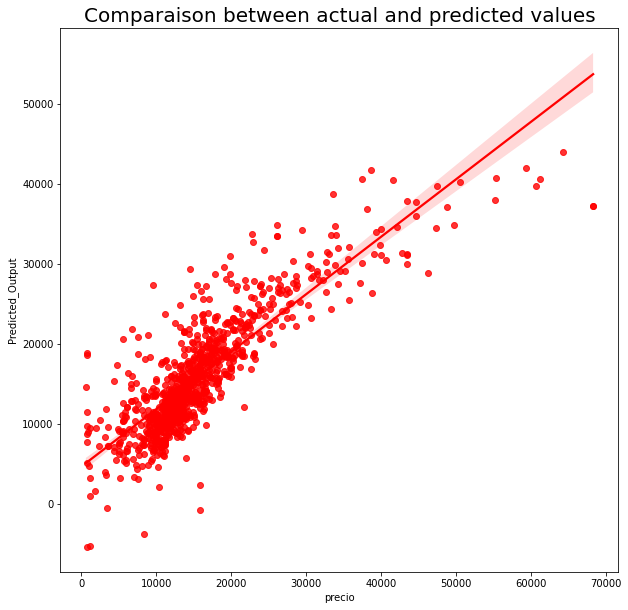

In [172]:
plt.figure(figsize=(10,10))
sns.regplot(data= results, y= 'Predicted_Output', x='precio', color='red')
plt.title('Comparaison between actual and predicted values', fontsize=20)

As we can see linear regression model is not doing very well since there is a big scatter in the output plot, it means that our model is not doing well on the test set.

In [174]:
mse_linear = mean_squared_error(y_predict1, y_test)
mae_linear = mean_absolute_error(y_predict1, y_test)


**2. Support Vector Regressor**

In [178]:
from sklearn.svm import SVR

In [179]:
model2 = SVR()
model2.fit(X_train, y_train)
y_predict2 = model2.predict(X_test)


In [180]:
y_predict2 = pd.DataFrame( y_predict2, columns= ['Predicted_output_svr'])

In [182]:
result2 = pd.concat([y_predict2, y_test.to_frame().reset_index(drop= True)], axis=1, ignore_index= False)

Text(0.5, 1.0, 'Comparision of predicted values and the actual values')

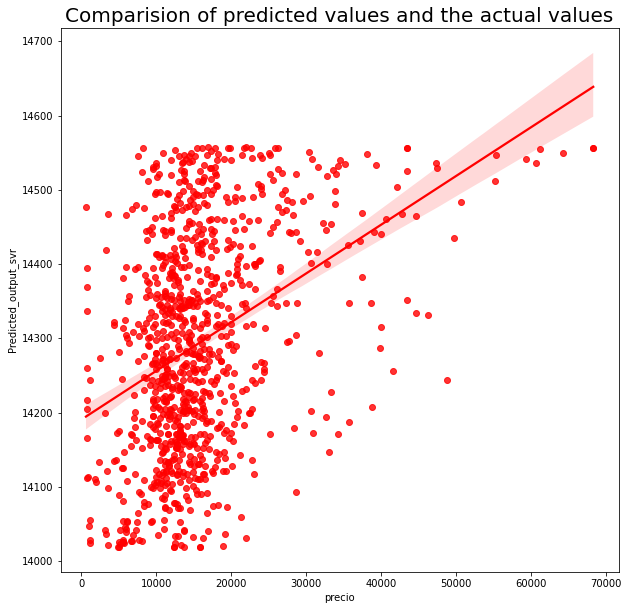

In [188]:
plt.figure(figsize= (10,10))
sns.regplot(data = results, x='precio', y= 'Predicted_output_svr', color='red')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)

In [189]:
mse_svr = mean_squared_error(y_predict2, y_test)
mae_svr = mean_absolute_error(y_predict2, y_test)

This plot clearly indicates that the model is not performing better than the Linear Regression model as the points between the prediction and the actual values are quite scattered from the line

**3. K- Neighbors Regressor**

In [190]:
from sklearn.neighbors import KNeighborsRegressor

In [198]:
model3= KNeighborsRegressor()
model3.fit(X_train, y_train)
y_predict3 = model3.predict( X_test)


In [199]:
y_predict3 = pd.DataFrame( y_predict3, columns= ['predicted_output_KNR'])
result3 = pd.concat([y_predict3, y_test.to_frame().reset_index(drop=True)], axis= 1, ignore_index=False)

Text(0.5, 1.0, 'Comparision of predicted values and the actual values')

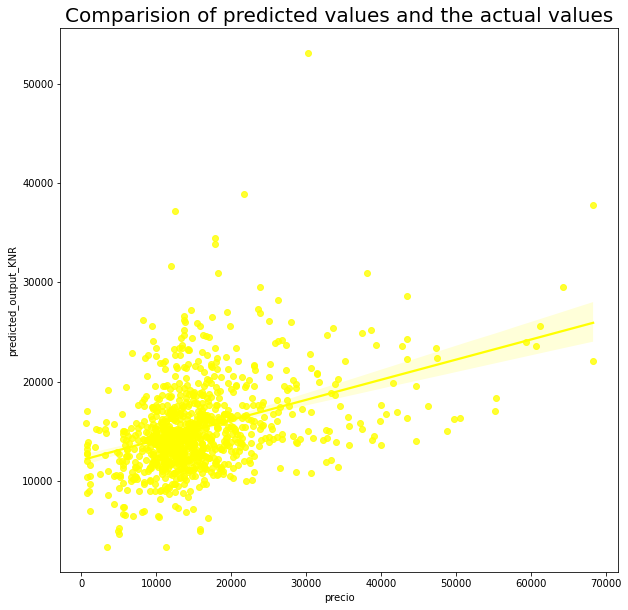

In [201]:
h

In [202]:
mse_knr = mean_squared_error(y_predict3, y_test)
mae_knr = mean_absolute_error(y_predict3, y_test)

As we can see K-neighbors Regression doesn't work very well since the actual values doesn't rely on the line prediction.

**4. Decision tree regression**

In [204]:
from sklearn.tree import DecisionTreeRegressor

In [205]:
model4 = DecisionTreeRegressor()
model4.fit( X_train, y_train)
y_predict4 = model4.predict(X_test)

In [206]:
y_predict4 = pd.DataFrame( y_predict4, columns=[ 'predicted_output_dtr'])
result4= pd.concat([y_predict4, y_test.to_frame().reset_index(drop= True)], axis=1, ignore_index=False)

Text(0.5, 1.0, 'Comparision of predicted values and the actual values')

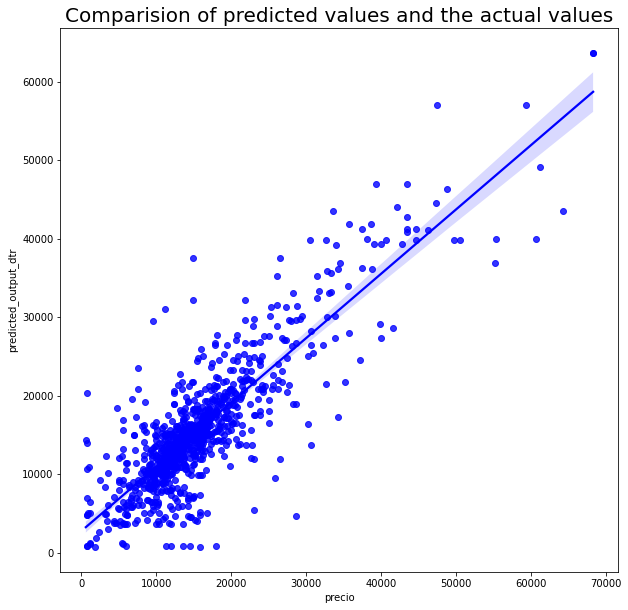

In [209]:
plt.figure(figsize=( 10, 10))
sns.regplot( data = result4, x= 'precio', y='predicted_output_dtr', color='blue')
plt.title('Comparision of predicted values and the actual values', fontsize = 20)

Decision tree regressor seems to work better than the two prevous model although so far, Linear regressor is the one which is working better.

In [210]:
mse_dtr = mean_squared_error(y_predict4, y_test)
mae_dtr = mean_absolute_error(y_predict4, y_test)

**5. Gradient boost regressor**

In [211]:
from sklearn.ensemble import GradientBoostingRegressor

In [212]:
model5 = GradientBoostingRegressor()
model5.fit(X_train, y_train)
y_predict5= model5.predict(X_test)

In [213]:
y_predict5 = pd.DataFrame( y_predict5, columns= ['predicted_output_gbr'])
result5 = pd.concat([y_predict5, y_test.to_frame().reset_index(drop=False)], axis=1, ignore_index=False)

Text(0.5, 1.0, 'Comparision of predicted values and the actual values')

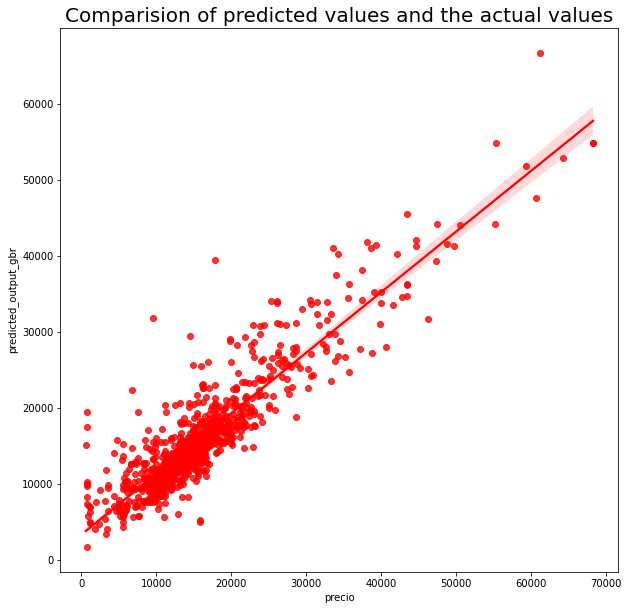

In [216]:
plt.figure(figsize=( 10, 10))
sns.regplot( data = result5, x= 'precio', y='predicted_output_gbr', color='red')
plt.title('Comparision of predicted values and the actual values', fontsize = 20)

In [217]:
mse_gbd = mean_squared_error(y_predict5, y_test)
mae_gbd = mean_absolute_error(y_predict5, y_test)

It's seems that gradient boosting regressor works better than the prevoius models, noting that the time complexity of this model is also high compared to the rest.
On the other hand, the mean absolute error (MAE) and mean squared error (MSE) are two common ways to calculate the average error. Both measures are used to evaluate the performance of regression models, which predict a continuous value. So let's plot them.

In [218]:
data= { 'mean_squeared_error': [mse_linear,  mse_svr, mse_dtr, mse_knr, mse_gbd], 'mean_abs_error':[mae_linear, mae_svr, mae_dtr, mae_knr, mae_gbd] }
df_1= pd.DataFrame(data, index= ['linear_reg', 'suport_vector', 'decision_tree','K-neighbors', 'gradient_boosting' ])

In [225]:
df_1

,mean_squeared_error,mean_abs_error
linear_reg,2.103965e+07,3050.672954
suport_vector,7.820329e+07,5573.299975
decision_tree,2.215648e+07,3101.183586
K-neighbors,6.692330e+07,5610.877719
gradient_boosting,1.360329e+07,2451.611994


Text(0.5, 1.0, 'Barplot of various machine learning regression models with mean absolute error')

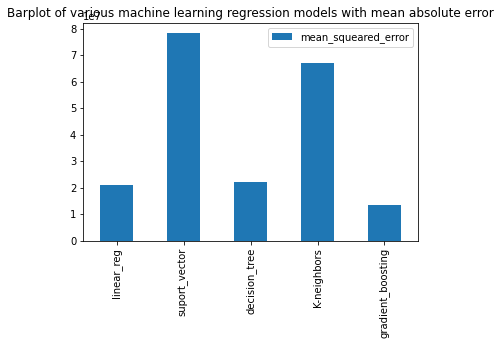

In [238]:

df_1.plot.bar( y= 'mean_squeared_error')
plt.title("Barplot of various machine learning regression models with mean absolute error")

Text(0.5, 1.0, 'Barplot of various machine learning regression models with mean absolute error')

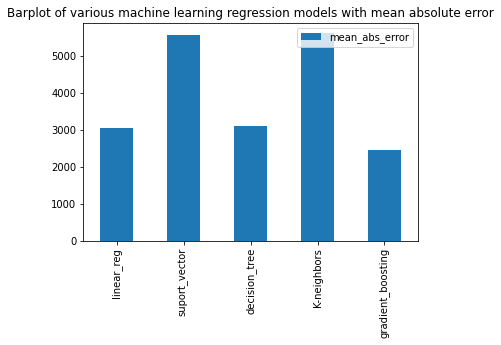

In [236]:

df_1.plot.bar( y= 'mean_abs_error')
plt.title("Barplot of various machine learning regression models with mean absolute error")

Based on the different model's outcomes it's clear that gradient boosting is the one working better followed by linear regression. Suport vector regression and K-neighbors should be not taking into consideration.However, the same model might perform the best for other tasks. Therefore, we should explore many models before deploying them in real-time.

On the other hand, we could increase the accuracy of our model in multiples ways by: 

-Using regularization (L1, L2 or L1+L2).              

-Using cross-validation

-Tuning hyperparameters

-Or using more ensembles, we already use gradient boosting regressor (which is an ensemble created from decision trees added sequentially to the model).





